In [1]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from warnings import filterwarnings
    filterwarnings('ignore')
    plt.rcParams['figure.figsize'] = (12,7)
    import scipy
    from scipy import stats
    from scipy.stats import ttest_ind
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from statsmodels.formula.api import ols
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import SGDRegressor
    from sklearn.metrics import mean_squared_error
    from statistics import mode
    from scipy.stats import chi2_contingency

In [2]:
data=pd.read_csv('E:\\Data analytics pga 23\\vinod sir notes\\Machine Learning\\Logistic Regression\\h1n1_vaccine_prediction.csv')
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


# Target variable is h1n1_vaccine

In [3]:
data.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

# is_h1n1_risky

In [4]:
data.is_h1n1_risky.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: is_h1n1_risky, dtype: int64

In [5]:
data.is_h1n1_risky.isnull().sum()

388

In [6]:
data.is_h1n1_risky.mode()

0    2.0
dtype: float64

In [7]:
data.is_h1n1_risky.fillna(data.is_h1n1_risky.mode()[0] , inplace = True)

In [8]:
data.is_h1n1_risky.isnull().sum()

0

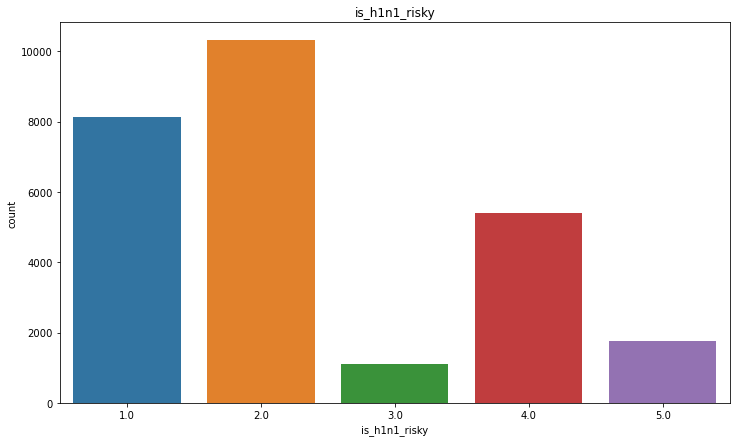

In [9]:
sns.countplot(data.is_h1n1_risky)
plt.title('is_h1n1_risky')
plt.show()

In [10]:
ct_is_h1n1_risky = pd.crosstab(data.is_h1n1_risky, data.h1n1_vaccine)

In [11]:
chi2_contingency(ct_is_h1n1_risky, correction = False)

(2842.259854334096,
 0.0,
 4,
 array([[6409.83963006, 1729.16036994],
        [8117.24008687, 2189.75991313],
        [ 879.6892575 ,  237.3107425 ],
        [4248.02493728, 1145.97506272],
        [1378.20608829,  371.79391171]]))

### Good predictor

# sick_from_h1n1_vacc

In [12]:
data.sick_from_h1n1_vacc.value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [13]:
data.sick_from_h1n1_vacc.isnull().sum()

395

In [14]:
data.sick_from_h1n1_vacc.mode()

0    2.0
dtype: float64

In [15]:
data.sick_from_h1n1_vacc.fillna(data.sick_from_h1n1_vacc.mode()[0] , inplace = True)

In [16]:
data.sick_from_h1n1_vacc.isnull().sum()

0

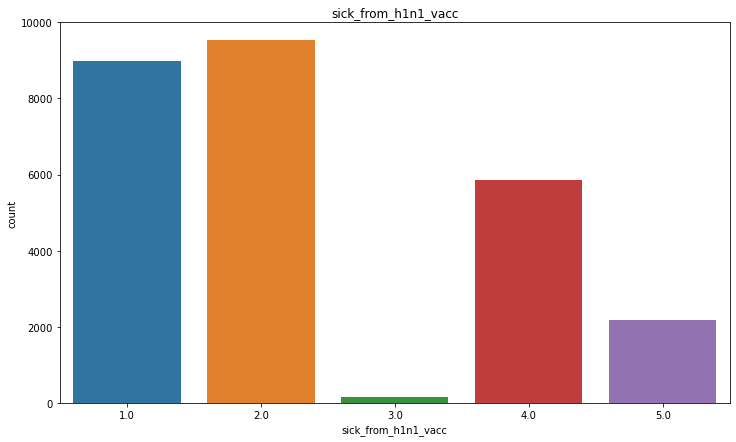

In [17]:
sns.countplot(data.sick_from_h1n1_vacc)
plt.title('sick_from_h1n1_vacc')
plt.show()

In [18]:
ct_sick_from_h1n1_vacc = pd.crosstab(data.sick_from_h1n1_vacc, data.h1n1_vaccine)

In [19]:
chi2_contingency(ct_sick_from_h1n1_vacc, correction = False)

(254.59089268297026,
 6.675769368968441e-54,
 4,
 array([[7086.34193283, 1911.65806717],
        [7500.59130565, 2023.40869435],
        [ 116.55685775,   31.44314225],
        [4607.14606657, 1242.85393343],
        [1722.3638372 ,  464.6361628 ]]))

### Good predictor

# is_seas_vacc_effective

In [20]:
data.is_seas_vacc_effective.value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [21]:
data.is_seas_vacc_effective.isnull().sum()

462

In [22]:
data.is_seas_vacc_effective.mode()

0    4.0
dtype: float64

In [23]:
data.is_seas_vacc_effective.fillna(data.is_seas_vacc_effective.mode()[0] , inplace = True)

In [24]:
data.is_seas_vacc_effective.isnull().sum()

0

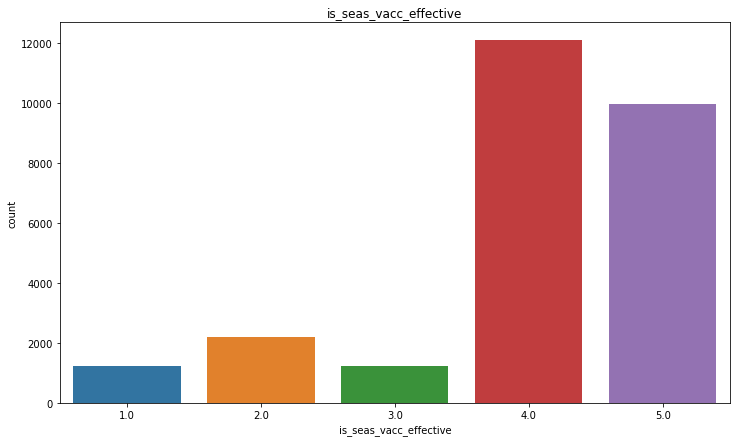

In [25]:
sns.countplot(data.is_seas_vacc_effective)
plt.title('is_seas_vacc_effective')
plt.show()

In [26]:
ct_is_seas_vacc_effective = pd.crosstab(data.is_seas_vacc_effective, data.h1n1_vaccine)

In [27]:
chi2_contingency(ct_is_seas_vacc_effective, correction = False)

(1015.2358583203843,
 1.7812550798256757e-218,
 4,
 array([[ 961.59407646,  259.40592354],
        [1737.32721758,  468.67278242],
        [ 957.65634478,  258.34365522],
        [9522.22275059, 2568.77724941],
        [7854.19961059, 2118.80038941]]))

### Good predictor

# is_seas_risky

In [28]:
data.is_seas_risky.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [29]:
data.is_seas_risky.isnull().sum()

514

In [30]:
data.is_seas_risky.mode()

0    2.0
dtype: float64

In [31]:
data.is_seas_risky.fillna(data.is_seas_risky.mode()[0] , inplace = True)

In [32]:
data.is_seas_risky.isnull().sum()

0

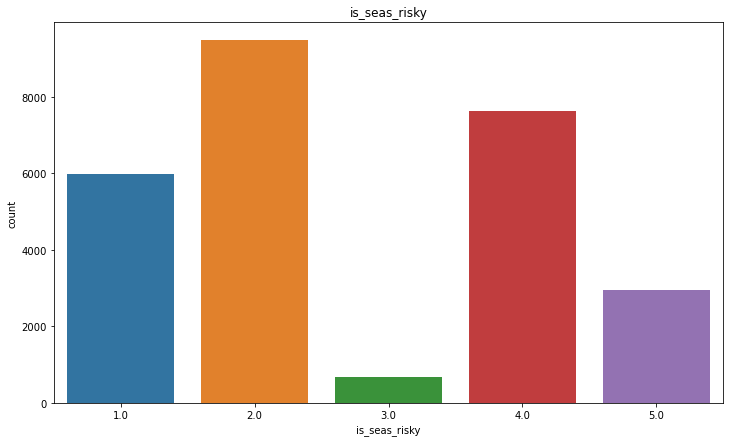

In [33]:
sns.countplot(data.is_seas_risky)
plt.title('is_seas_risky')
plt.show()

In [34]:
ct_is_seas_risky = pd.crosstab(data.is_seas_risky, data.h1n1_vaccine)

In [35]:
chi2_contingency(ct_is_seas_risky, correction = False)

(1757.3448032431027,
 0.0,
 4,
 array([[4704.80181226, 1269.19818774],
        [7456.48871082, 2011.51128918],
        [ 533.16886958,  143.83113042],
        [6008.97854495, 1621.02145505],
        [2329.56206238,  628.43793762]]))

### Good predictor

# sick_from_seas_vacc

In [36]:
data.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [37]:
data.sick_from_seas_vacc.isnull().sum()

537

In [38]:
data.sick_from_seas_vacc.mode()

0    1.0
dtype: float64

In [39]:
data.sick_from_seas_vacc.fillna(data.sick_from_seas_vacc.mode()[0] , inplace = True)

In [40]:
data.sick_from_seas_vacc.isnull().sum()

0

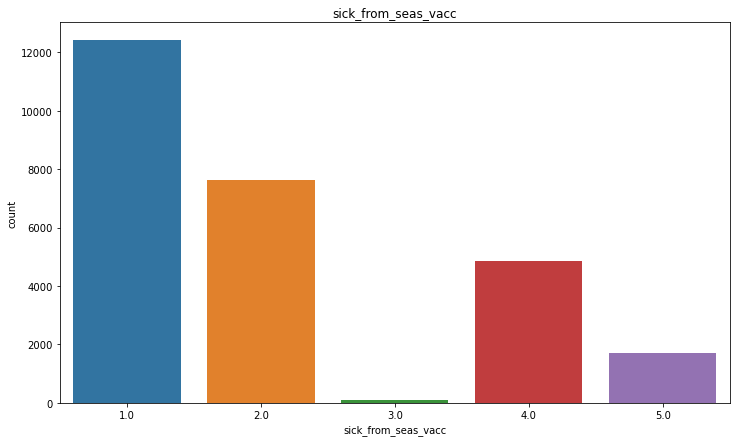

In [41]:
sns.countplot(data.sick_from_seas_vacc)
plt.title('sick_from_seas_vacc')
plt.show()

In [42]:
ct_sick_from_seas_vacc = pd.crosstab(data.sick_from_seas_vacc, data.h1n1_vaccine)

In [43]:
chi2_contingency(ct_sick_from_seas_vacc, correction = False)

(45.127510978784706,
 3.7405030013106724e-09,
 4,
 array([[9771.08739282, 2635.91260718],
        [6011.34118396, 1621.65881604],
        [  74.0293556 ,   19.9706444 ],
        [3821.17482308, 1030.82517692],
        [1355.36724454,  365.63275546]]))

### Good predictor

# age_bracket

In [44]:
data.age_bracket.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [46]:
data.age_bracket.isnull().sum()

0

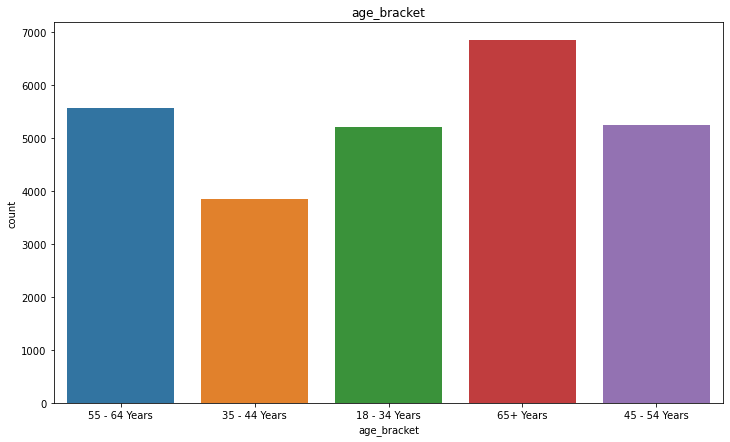

In [47]:
sns.countplot(data.age_bracket)
plt.title('age_bracket')
plt.show()

In [49]:
ct_age_bracket = pd.crosstab(data.age_bracket, data.h1n1_vaccine)

In [50]:
chi2_contingency(ct_age_bracket, correction = False)

(69.44576247937547,
 2.9716028185463074e-14,
 4,
 array([[4107.05414311, 1107.94585689],
        [3030.47830157,  817.52169843],
        [4125.16770884, 1112.83229116],
        [4381.12026809, 1181.87973191],
        [5389.17957839, 1453.82042161]]))

### Good predictor

# qualification

In [53]:
data.qualification.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [55]:
data.qualification.isnull().sum()

1407

In [56]:
data.qualification.mode()

0    College Graduate
dtype: object

In [57]:
data.qualification.fillna(data.qualification.mode()[0] , inplace = True)

In [58]:
data.qualification.isnull().sum()

0

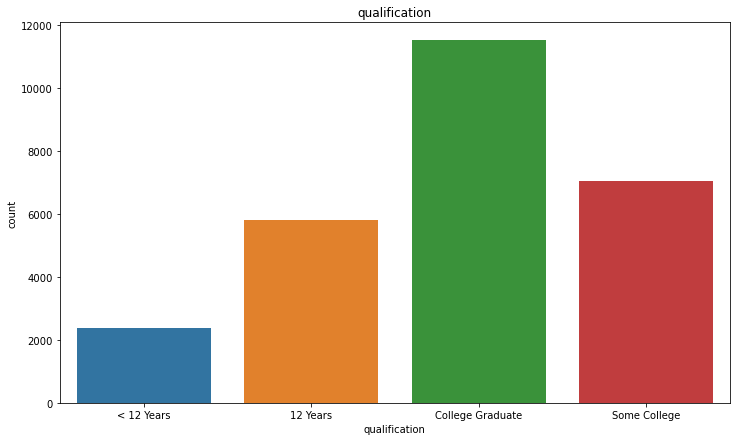

In [59]:
sns.countplot(data.qualification)
plt.title('qualification')
plt.show()

In [61]:
ct_qualification = pd.crosstab(data.qualification, data.h1n1_vaccine)

In [62]:
chi2_contingency(ct_qualification, correction = False)

(103.18537711307252,
 3.209804092590849e-22,
 3,
 array([[4565.40611076, 1231.59388924],
        [1860.97199236,  502.02800764],
        [9059.93305126, 2444.06694874],
        [5546.68884562, 1496.31115438]]))

### Good predictor

# race

In [64]:
data.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [65]:
data.race.isnull().sum()

0

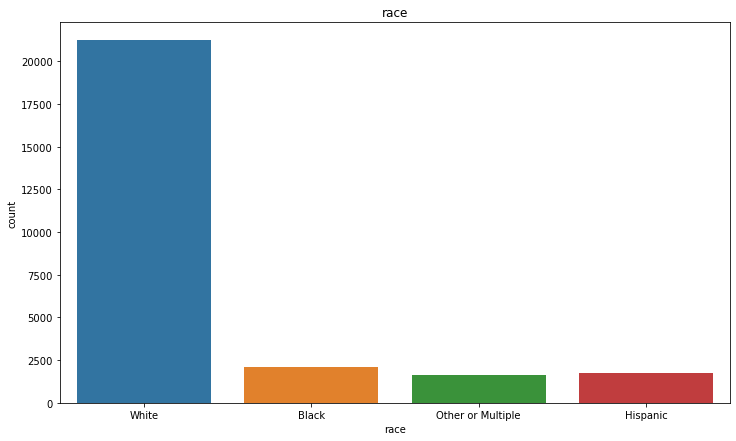

In [66]:
sns.countplot(data.race)
plt.title('race')
plt.show()

In [68]:
ct_race = pd.crosstab(data.race, data.h1n1_vaccine)

In [69]:
chi2_contingency(ct_race, correction = False)

(57.01119582422927,
 2.5557770361705444e-12,
 3,
 array([[ 1668.02314   ,   449.97686   ],
        [ 1382.14381997,   372.85618003],
        [ 1269.5246939 ,   342.4753061 ],
        [16713.30834613,  4508.69165387]]))

### Good predictor

# 